# **Introduction** # 
This case study is the career of "[Google Data Analytics Capstone: Complete a Case Study](https://www.coursera.org/learn/google-data-analytics-capstone)
" course of [Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics) For the purposes of this case study,the data has been made available by
Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement).The dataset of the provided a bikeshare company's data of its customer's trip details over 26 months of (April 2020 - May 2022).


# **Process of Analysis**
**1. Ask**
  * Ask effective questions
  * Define the scope of the analysis
  * Define what success looks like
  

**2. Prepare**
  * Verify data’s integrity
  * Check data credibility and reliability
  * Check data types
  * Merge datasets
  

**3. Process**
  * Clean, Remove and Transform data
  * Document cleaning processes and results
  

**4. Analyze**
  * Identify patterns
  * Draw conclusions
  * Make predictions
  

**5. Share**
  * Create effective visuals
  * Create a story for data
  * Share insights to stakeholders
  

**6. Act**
  * Give recommendations based on insights
  * Solve problems
  * Create something new

# **Scenario**


Design marketing strategies aimed at converting casual riders into annual members. In order to
do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why
casual riders would buy a membership, and how digital media could affect their marketing tactics

### **ASK**
**Three questions will guide the future marketing program:**
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

##### **Objective**
Based on the scenario, thus, the objectives of analyst is to build the guideline information based on the data provided to illustrate how to converting casual riders into a membership

###### **Report with the following deliverables**

* Insight of differences of casual riders and membership
* Provide a visualization to support the the analysis
* Based on insight acquired from analysis, Provide the recommendation to solve the problem


### **PREPARE**

###### **ROCCC of the dataset**
1. Reliable : The data is came from the reliable source which provided as case study
2. Original : The data is from the original source as the fictional source for case study purpose
3. Comprehensive : The data is understandable arrangement
4. Current : The dataset is provided lasted 26 months of the company usage log
5. Cited : It is cited by the company only.(Fictional company)

###### **How are you addressing licensing, privacy, security, and accessibility?**
* How did you verify the data’s integrity?
    * validate of the input source of the data 
* How does it help you answer your question?
    * The data will provide the insight of difference style of use of casual and member. Thus, we will be able to provide the answers to the question
* Are there any problems with the data?
    * There are some missing value in the column but based on the data we got. It is enough to come up with the ideas.

##### **Let's prepare the data by importing it**

In [1]:
#Let's start with loading the libraries in used

library(tidyverse)
library(ggplot2)
library(lubridate)
library(dplyr)
library(readr)
library(janitor)
library(data.table)
library(tidyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
#loading the dataset of lasted 12 month in used
trip202106 <- read.csv('../input/google-data-analytics-capstone-cyclistic-data/202106-divvy-tripdata.csv')
trip202107 <- read.csv('../input/google-data-analytics-capstone-cyclistic-data/202107-divvy-tripdata.csv')
trip202108 <- read.csv('../input/google-data-analytics-capstone-cyclistic-data/202108-divvy-tripdata.csv')
trip202109 <- read.csv('../input/google-data-analytics-capstone-cyclistic-data/202109-divvy-tripdata.csv')
trip202110 <- read.csv('../input/google-data-analytics-capstone-cyclistic-data/202110-divvy-tripdata.csv')
trip202111 <- read.csv('../input/google-data-analytics-capstone-cyclistic-data/202111-divvy-tripdata.csv')
trip202112 <- read.csv('../input/google-data-analytics-capstone-cyclistic-data/202112-divvy-tripdata.csv')
trip202201 <- read.csv('../input/google-data-analytics-capstone-cyclistic-data/202201-divvy-tripdata.csv')
trip202202 <- read.csv('../input/google-data-analytics-capstone-cyclistic-data/202202-divvy-tripdata.csv')
trip202203 <- read.csv('../input/google-data-analytics-capstone-cyclistic-data/202203-divvy-tripdata.csv')
trip202204 <- read.csv('../input/google-data-analytics-capstone-cyclistic-data/202204-divvy-tripdata.csv')


In [3]:
glimpse(trip202106)

Rows: 729,595
Columns: 13
$ ride_id            <chr> "99FEC93BA843FB20", "06048DCFC8520CAF", "9598066F68…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <chr> "2021-06-13 14:31:28", "2021-06-04 11:18:02", "2021…
$ ended_at           <chr> "2021-06-13 14:34:11", "2021-06-04 11:24:19", "2021…
$ start_station_name <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ start_station_id   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ end_station_name   <chr> "", "", "", "", "", "", "", "", "", "Michigan Ave &…
$ end_station_id     <chr> "", "", "", "", "", "", "", "", "", "13042", "", ""…
$ start_lat          <dbl> 41.80, 41.79, 41.80, 41.78, 41.80, 41.78, 41.79, 41…
$ start_lng          <dbl> -87.59, -87.59, -87.60, -87.58, -87.59, -87.58, -87…
$ end_lat            <dbl> 41.80000, 41.80000, 41.79000, 41.80000, 41.79000, 4…
$ end_lng            <dbl> -87.6000, -87.6000, -87.5900, -87.6000, -87.5900, -…
$ member_casua

In [4]:
glimpse(trip202107)

Rows: 822,410
Columns: 13
$ ride_id            <chr> "0A1B623926EF4E16", "B2D5583A5A5E76EE", "6F264597DD…
$ rideable_type      <chr> "docked_bike", "classic_bike", "classic_bike", "cla…
$ started_at         <chr> "2021-07-02 14:44:36", "2021-07-07 16:57:42", "2021…
$ ended_at           <chr> "2021-07-02 15:19:58", "2021-07-07 17:16:09", "2021…
$ start_station_name <chr> "Michigan Ave & Washington St", "California Ave & C…
$ start_station_id   <chr> "13001", "17660", "SL-012", "17660", "17660", "1766…
$ end_station_name   <chr> "Halsted St & North Branch St", "Wood St & Hubbard …
$ end_station_id     <chr> "KA1504000117", "13432", "KA1503000044", "13196", "…
$ start_lat          <dbl> 41.88398, 41.90036, 41.86038, 41.90036, 41.90035, 4…
$ start_lng          <dbl> -87.62468, -87.69670, -87.62581, -87.69670, -87.696…
$ end_lat            <dbl> 41.89937, 41.88990, 41.89017, 41.89456, 41.88659, 4…
$ end_lng            <dbl> -87.64848, -87.67147, -87.62619, -87.65345, -87.658…
$ member_casua

In [5]:
glimpse(trip202108)

Rows: 804,352
Columns: 13
$ ride_id            <chr> "99103BB87CC6C1BB", "EAFCCCFB0A3FC5A1", "9EF4F46C57…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <chr> "2021-08-10 17:15:49", "2021-08-10 17:23:14", "2021…
$ ended_at           <chr> "2021-08-10 17:22:44", "2021-08-10 17:39:24", "2021…
$ start_station_name <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ start_station_id   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ end_station_name   <chr> "", "", "", "", "", "", "", "Clark St & Grace St", …
$ end_station_id     <chr> "", "", "", "", "", "", "", "TA1307000127", "", "",…
$ start_lat          <dbl> 41.77000, 41.77000, 41.95000, 41.97000, 41.79000, 4…
$ start_lng          <dbl> -87.68000, -87.68000, -87.65000, -87.67000, -87.600…
$ end_lat            <dbl> 41.77000, 41.77000, 41.97000, 41.95000, 41.77000, 4…
$ end_lng            <dbl> -87.68000, -87.63000, -87.66000, -87.65000, -87.620…
$ member_casua

In [6]:
glimpse(trip202109)

Rows: 756,147
Columns: 13
$ ride_id            <chr> "9DC7B962304CBFD8", "F930E2C6872D6B32", "6EF7213790…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <chr> "2021-09-28 16:07:10", "2021-09-28 14:24:51", "2021…
$ ended_at           <chr> "2021-09-28 16:09:54", "2021-09-28 14:40:05", "2021…
$ start_station_name <chr> "", "", "", "", "", "", "", "", "", "", "Clark St &…
$ start_station_id   <chr> "", "", "", "", "", "", "", "", "", "", "TA13070001…
$ end_station_name   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ end_station_id     <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ start_lat          <dbl> 41.89000, 41.94000, 41.81000, 41.80000, 41.88000, 4…
$ start_lng          <dbl> -87.68000, -87.64000, -87.72000, -87.72000, -87.740…
$ end_lat            <dbl> 41.89, 41.98, 41.80, 41.81, 41.88, 41.88, 41.74, 41…
$ end_lng            <dbl> -87.67, -87.67, -87.72, -87.72, -87.71, -87.74, -87…
$ member_casua

In [7]:
glimpse(trip202110)

Rows: 631,226
Columns: 13
$ ride_id            <chr> "620BC6107255BF4C", "4471C70731AB2E45", "26CA69D43D…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <chr> "2021-10-22 12:46:42", "2021-10-21 09:12:37", "2021…
$ ended_at           <chr> "2021-10-22 12:49:50", "2021-10-21 09:14:14", "2021…
$ start_station_name <chr> "Kingsbury St & Kinzie St", "", "", "", "", "", "",…
$ start_station_id   <chr> "KA1503000043", "", "", "", "", "", "", "", "", "",…
$ end_station_name   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ end_station_id     <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ start_lat          <dbl> 41.88919, 41.93000, 41.92000, 41.92000, 41.89000, 4…
$ start_lng          <dbl> -87.63850, -87.70000, -87.70000, -87.69000, -87.710…
$ end_lat            <dbl> 41.89000, 41.93000, 41.94000, 41.92000, 41.89000, 4…
$ end_lng            <dbl> -87.63000, -87.71000, -87.72000, -87.69000, -87.690…
$ member_casua

In [8]:
glimpse(trip202111)

Rows: 359,978
Columns: 13
$ ride_id            <chr> "7C00A93E10556E47", "90854840DFD508BA", "0A7D10CDD1…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <chr> "2021-11-27 13:27:38", "2021-11-27 13:38:25", "2021…
$ ended_at           <chr> "2021-11-27 13:46:38", "2021-11-27 13:56:10", "2021…
$ start_station_name <chr> "", "", "", "", "", "Michigan Ave & Oak St", "", ""…
$ start_station_id   <chr> "", "", "", "", "", "13042", "", "", "", "", "", ""…
$ end_station_name   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ end_station_id     <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ start_lat          <dbl> 41.93000, 41.96000, 41.96000, 41.94000, 41.90000, 4…
$ start_lng          <dbl> -87.72000, -87.70000, -87.70000, -87.79000, -87.630…
$ end_lat            <dbl> 41.96, 41.92, 41.96, 41.93, 41.88, 41.90, 41.80, 41…
$ end_lng            <dbl> -87.73, -87.70, -87.70, -87.79, -87.62, -87.63, -87…
$ member_casua

In [9]:
glimpse(trip202112)

Rows: 247,540
Columns: 13
$ ride_id            <chr> "46F8167220E4431F", "73A77762838B32FD", "4CF4245205…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <chr> "2021-12-07 15:06:07", "2021-12-11 03:43:29", "2021…
$ ended_at           <chr> "2021-12-07 15:13:42", "2021-12-11 04:10:23", "2021…
$ start_station_name <chr> "Laflin St & Cullerton St", "LaSalle Dr & Huron St"…
$ start_station_id   <chr> "13307", "KP1705001026", "KA1504000117", "KA1504000…
$ end_station_name   <chr> "Morgan St & Polk St", "Clarendon Ave & Leland Ave"…
$ end_station_id     <chr> "TA1307000130", "TA1307000119", "13137", "KP1705001…
$ start_lat          <dbl> 41.85483, 41.89441, 41.89936, 41.89939, 41.89558, 4…
$ start_lng          <dbl> -87.66366, -87.63233, -87.64852, -87.64854, -87.682…
$ end_lat            <dbl> 41.87197, 41.96797, 41.93758, 41.89488, 41.93125, 4…
$ end_lng            <dbl> -87.65097, -87.65000, -87.64410, -87.63233, -87.644…
$ member_casua

In [10]:
glimpse(trip202201)

Rows: 103,770
Columns: 13
$ ride_id            <chr> "C2F7DD78E82EC875", "A6CF8980A652D272", "BD0F91DFF7…
$ rideable_type      <chr> "electric_bike", "electric_bike", "classic_bike", "…
$ started_at         <chr> "2022-01-13 11:59:47", "2022-01-10 08:41:56", "2022…
$ ended_at           <chr> "2022-01-13 12:02:44", "2022-01-10 08:46:17", "2022…
$ start_station_name <chr> "Glenwood Ave & Touhy Ave", "Glenwood Ave & Touhy A…
$ start_station_id   <chr> "525", "525", "TA1306000016", "KA1504000151", "TA13…
$ end_station_name   <chr> "Clark St & Touhy Ave", "Clark St & Touhy Ave", "Gr…
$ end_station_id     <chr> "RP-007", "RP-007", "TA1307000001", "TA1309000021",…
$ start_lat          <dbl> 42.01280, 42.01276, 41.92560, 41.98359, 41.87785, 4…
$ start_lng          <dbl> -87.66591, -87.66597, -87.65371, -87.66915, -87.624…
$ end_lat            <dbl> 42.01256, 42.01256, 41.92533, 41.96151, 41.88462, 4…
$ end_lng            <dbl> -87.67437, -87.67437, -87.66580, -87.67139, -87.627…
$ member_casua

In [11]:
glimpse(trip202202)

Rows: 115,609
Columns: 13
$ ride_id            <chr> "E1E065E7ED285C02", "1602DCDC5B30FFE3", "BE7DD2AF4B…
$ rideable_type      <chr> "classic_bike", "classic_bike", "classic_bike", "cl…
$ started_at         <chr> "2022-02-19 18:08:41", "2022-02-20 17:41:30", "2022…
$ ended_at           <chr> "2022-02-19 18:23:56", "2022-02-20 17:45:56", "2022…
$ start_station_name <chr> "State St & Randolph St", "Halsted St & Wrightwood …
$ start_station_id   <chr> "TA1305000029", "TA1309000061", "TA1305000029", "13…
$ end_station_name   <chr> "Clark St & Lincoln Ave", "Southport Ave & Wrightwo…
$ end_station_id     <chr> "13179", "TA1307000113", "13011", "13323", "TA13070…
$ start_lat          <dbl> 41.88462, 41.92914, 41.88462, 41.94815, 41.88462, 4…
$ start_lng          <dbl> -87.62783, -87.64908, -87.62783, -87.66394, -87.627…
$ end_lat            <dbl> 41.91569, 41.92877, 41.87926, 41.95283, 41.88584, 4…
$ end_lng            <dbl> -87.63460, -87.66391, -87.63990, -87.64999, -87.635…
$ member_casua

In [12]:
glimpse(trip202203)

Rows: 284,042
Columns: 13
$ ride_id            <chr> "47EC0A7F82E65D52", "8494861979B0F477", "EFE527AF80…
$ rideable_type      <chr> "classic_bike", "electric_bike", "classic_bike", "c…
$ started_at         <chr> "2022-03-21 13:45:01", "2022-03-16 09:37:16", "2022…
$ ended_at           <chr> "2022-03-21 13:51:18", "2022-03-16 09:43:34", "2022…
$ start_station_name <chr> "Wabash Ave & Wacker Pl", "Michigan Ave & Oak St", …
$ start_station_id   <chr> "TA1307000131", "13042", "13109", "TA1307000131", "…
$ end_station_name   <chr> "Kingsbury St & Kinzie St", "Orleans St & Chestnut …
$ end_station_id     <chr> "KA1503000043", "620", "15578", "TA1305000025", "13…
$ start_lat          <dbl> 41.88688, 41.90100, 41.97835, 41.88688, 41.91172, 4…
$ start_lng          <dbl> -87.62603, -87.62375, -87.65975, -87.62603, -87.626…
$ end_lat            <dbl> 41.88918, 41.89820, 41.98404, 41.87771, 41.87794, 4…
$ end_lng            <dbl> -87.63851, -87.63754, -87.66027, -87.63532, -87.662…
$ member_casua

In [13]:
glimpse(trip202204)

Rows: 371,249
Columns: 13
$ ride_id            <chr> "3564070EEFD12711", "0B820C7FCF22F489", "89EEEE3229…
$ rideable_type      <chr> "electric_bike", "classic_bike", "classic_bike", "c…
$ started_at         <chr> "2022-04-06 17:42:48", "2022-04-24 19:23:07", "2022…
$ ended_at           <chr> "2022-04-06 17:54:36", "2022-04-24 19:43:17", "2022…
$ start_station_name <chr> "Paulina St & Howard St", "Wentworth Ave & Cermak R…
$ start_station_id   <chr> "515", "13075", "TA1307000121", "13075", "TA1307000…
$ end_station_name   <chr> "University Library (NU)", "Green St & Madison St",…
$ end_station_id     <chr> "605", "TA1307000120", "TA1307000120", "KA170600500…
$ start_lat          <dbl> 42.01913, 41.85308, 41.87184, 41.85308, 41.87181, 4…
$ start_lng          <dbl> -87.67353, -87.63193, -87.64664, -87.63193, -87.646…
$ end_lat            <dbl> 42.05294, 41.88189, 41.88189, 41.86749, 41.88224, 4…
$ end_lng            <dbl> -87.67345, -87.64879, -87.64879, -87.63219, -87.641…
$ member_casua

In [14]:
#Merge All dataset
all_trips_data <- 
    rbind(trip202106,
          trip202107,
          trip202108,
          trip202109,
          trip202110,
          trip202111,
          trip202112,
          trip202201,
          trip202202,
          trip202203,
          trip202204)


In [15]:
head(all_trips_data)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,,,,,41.80,-87.59,41.80,-87.60,member
2,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,,,,,41.79,-87.59,41.80,-87.60,member
3,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,,,,,41.80,-87.60,41.79,-87.59,member
4,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,,,,,41.78,-87.58,41.80,-87.60,member
5,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,,,,,41.80,-87.59,41.79,-87.59,member
6,62B943CEAAA420BA,electric_bike,2021-06-03 19:32:01,2021-06-03 19:38:46,,,,,41.78,-87.58,41.78,-87.58,member


In [16]:
glimpse(all_trips_data)

Rows: 5,225,918
Columns: 13
$ ride_id            <chr> "99FEC93BA843FB20", "06048DCFC8520CAF", "9598066F68…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <chr> "2021-06-13 14:31:28", "2021-06-04 11:18:02", "2021…
$ ended_at           <chr> "2021-06-13 14:34:11", "2021-06-04 11:24:19", "2021…
$ start_station_name <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ start_station_id   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ end_station_name   <chr> "", "", "", "", "", "", "", "", "", "Michigan Ave &…
$ end_station_id     <chr> "", "", "", "", "", "", "", "", "", "13042", "", ""…
$ start_lat          <dbl> 41.80, 41.79, 41.80, 41.78, 41.80, 41.78, 41.79, 41…
$ start_lng          <dbl> -87.59, -87.59, -87.60, -87.58, -87.59, -87.58, -87…
$ end_lat            <dbl> 41.80000, 41.80000, 41.79000, 41.80000, 41.79000, 4…
$ end_lng            <dbl> -87.6000, -87.6000, -87.5900, -87.6000, -87.5900, -…
$ member_cas

### **PROCESS**
* What tools are you choosing and why?
    * As the dataset is containing 5,225,918 Rows with the columns of 13. I decide to use R languages for data visualization and data manipulation and data visualization purpose with the spreedsheet data type.
* Have you ensured your data’s integrity?
    * After the preparation method, we have ensured the intrigity of data.
* What steps have you taken to ensure that your data is clean?
    * Remove the rows which will be not used and filtered out the data which are negative values
* How can you verify that your data is clean and ready to analyze?
    * After the data manipulation and data cleaning process, we arranged into the format to be analyzed and recheck for data intrigity for verification of data.
* Have you documented your cleaning process so you can review and share those results?
    * As the kaggle notebook, every process have been performed will be collected. Thus, I could share.


In [17]:
# We are now starting the data checking and data cleaning process
is.na(all_trips_data)
colSums(is.na(all_trips_data))

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
                 0                  0                  0                  0 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               4314               4314 
     member_casual 
                 0

In [18]:
#There are some data which are N/A containing in the dataset Thus we will remove it
all_trips_data <- all_trips_data[rowSums(is.na(all_trips_data)) == 0, ]

In [19]:
#Verify whether the data N/A is still there
is.na(all_trips_data)
colSums(is.na(all_trips_data))

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
6,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
7,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
8,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
9,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
10,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
                 0                  0                  0                  0 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0                  0                  0 
     member_casual 
                 0

In [20]:
glimpse(all_trips_data)

Rows: 5,221,604
Columns: 13
$ ride_id            <chr> "99FEC93BA843FB20", "06048DCFC8520CAF", "9598066F68…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <chr> "2021-06-13 14:31:28", "2021-06-04 11:18:02", "2021…
$ ended_at           <chr> "2021-06-13 14:34:11", "2021-06-04 11:24:19", "2021…
$ start_station_name <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ start_station_id   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ end_station_name   <chr> "", "", "", "", "", "", "", "", "", "Michigan Ave &…
$ end_station_id     <chr> "", "", "", "", "", "", "", "", "", "13042", "", ""…
$ start_lat          <dbl> 41.80, 41.79, 41.80, 41.78, 41.80, 41.78, 41.79, 41…
$ start_lng          <dbl> -87.59, -87.59, -87.60, -87.58, -87.59, -87.58, -87…
$ end_lat            <dbl> 41.80000, 41.80000, 41.79000, 41.80000, 41.79000, 4…
$ end_lng            <dbl> -87.6000, -87.6000, -87.5900, -87.6000, -87.5900, -…
$ member_cas

In [21]:
distinct(all_trips_data,member_casual)

member_casual
<chr>
member
casual


In [22]:
distinct(all_trips_data,rideable_type)

rideable_type
<chr>
electric_bike
classic_bike
docked_bike


In [23]:
#Still there is the data which is not N/A but is not usable in data set in some column.
#Thus, we will not bring that to analyze as the data might mislead us
all_trips_data <- subset (all_trips_data, select = -c(start_station_name ,start_station_id, end_station_name,end_station_id))

In [24]:
glimpse(all_trips_data)

Rows: 5,221,604
Columns: 9
$ ride_id       <chr> "99FEC93BA843FB20", "06048DCFC8520CAF", "9598066F68045DF…
$ rideable_type <chr> "electric_bike", "electric_bike", "electric_bike", "elec…
$ started_at    <chr> "2021-06-13 14:31:28", "2021-06-04 11:18:02", "2021-06-0…
$ ended_at      <chr> "2021-06-13 14:34:11", "2021-06-04 11:24:19", "2021-06-0…
$ start_lat     <dbl> 41.80, 41.79, 41.80, 41.78, 41.80, 41.78, 41.79, 41.79, …
$ start_lng     <dbl> -87.59, -87.59, -87.60, -87.58, -87.59, -87.58, -87.60, …
$ end_lat       <dbl> 41.80000, 41.80000, 41.79000, 41.80000, 41.79000, 41.780…
$ end_lng       <dbl> -87.6000, -87.6000, -87.5900, -87.6000, -87.5900, -87.58…
$ member_casual <chr> "member", "member", "member", "member", "member", "membe…


In [25]:
#There is some row which the started_at time is later ended_at which is not reasonable
#Thus we will filter it out
all_trips_data_cleaned <- filter(all_trips_data,difftime(ended_at,started_at) >= 0)

In [26]:
filter(all_trips_data_cleaned,difftime(ended_at,started_at)<0)

ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


In [27]:
all_trips_data_cleaned[['started_at']] <- ymd_hms(all_trips_data_cleaned[['started_at']])
all_trips_data_cleaned[['ended_at']] <- ymd_hms(all_trips_data_cleaned[['ended_at']])

str(all_trips_data_cleaned)

'data.frame':	5221466 obs. of  9 variables:
 $ ride_id      : chr  "99FEC93BA843FB20" "06048DCFC8520CAF" "9598066F68045DF2" "B03C0FE48C412214" ...
 $ rideable_type: chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at   : POSIXct, format: "2021-06-13 14:31:28" "2021-06-04 11:18:02" ...
 $ ended_at     : POSIXct, format: "2021-06-13 14:34:11" "2021-06-04 11:24:19" ...
 $ start_lat    : num  41.8 41.8 41.8 41.8 41.8 ...
 $ start_lng    : num  -87.6 -87.6 -87.6 -87.6 -87.6 ...
 $ end_lat      : num  41.8 41.8 41.8 41.8 41.8 ...
 $ end_lng      : num  -87.6 -87.6 -87.6 -87.6 -87.6 ...
 $ member_casual: chr  "member" "member" "member" "member" ...


In [28]:
# mutate aggregated data for analysis
all_trips_data_v2 <- all_trips_data_cleaned %>% 
  mutate("ride_length" = as.numeric(difftime(ended_at,started_at)),
                                    "day_of_week" = weekdays(started_at),
                                    "day"=as.integer(day(started_at)),
         "month"=month.name[month(started_at)],
         "year"=as.integer(year(started_at)))

In [29]:
glimpse(all_trips_data_v2)

Rows: 5,221,466
Columns: 14
$ ride_id       <chr> "99FEC93BA843FB20", "06048DCFC8520CAF", "9598066F68045DF…
$ rideable_type <chr> "electric_bike", "electric_bike", "electric_bike", "elec…
$ started_at    <dttm> 2021-06-13 14:31:28, 2021-06-04 11:18:02, 2021-06-04 09…
$ ended_at      <dttm> 2021-06-13 14:34:11, 2021-06-04 11:24:19, 2021-06-04 09…
$ start_lat     <dbl> 41.80, 41.79, 41.80, 41.78, 41.80, 41.78, 41.79, 41.79, …
$ start_lng     <dbl> -87.59, -87.59, -87.60, -87.58, -87.59, -87.58, -87.60, …
$ end_lat       <dbl> 41.80000, 41.80000, 41.79000, 41.80000, 41.79000, 41.780…
$ end_lng       <dbl> -87.6000, -87.6000, -87.5900, -87.6000, -87.5900, -87.58…
$ member_casual <chr> "member", "member", "member", "member", "member", "membe…
$ ride_length   <dbl> 163, 377, 359, 1550, 248, 405, 371, 378, 526, 551, 706, …
$ day_of_week   <chr> "Sunday", "Friday", "Friday", "Thursday", "Friday", "Thu…
$ day           <int> 13, 4, 4, 3, 4, 3, 10, 10, 10, 23, 22, 29, 5, 5, 5, 22, …
$ month     

In [30]:
head(all_trips_data_v2)

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,day,month,year
,<chr>,<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<int>
1,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,41.80,-87.59,41.80,-87.60,member,163,Sunday,13,June,2021
2,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,41.79,-87.59,41.80,-87.60,member,377,Friday,4,June,2021
3,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,41.80,-87.60,41.79,-87.59,member,359,Friday,4,June,2021
4,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,41.78,-87.58,41.80,-87.60,member,1550,Thursday,3,June,2021
5,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,41.80,-87.59,41.79,-87.59,member,248,Friday,4,June,2021
6,62B943CEAAA420BA,electric_bike,2021-06-03 19:32:01,2021-06-03 19:38:46,41.78,-87.58,41.78,-87.58,member,405,Thursday,3,June,2021


In [31]:
all_trips_data_v2$day_of_week <- format(as.Date(all_trips_data_v2$started_at),'%a')

In [32]:
all_trips_data_v2$month <- format(as.Date(all_trips_data_v2$started_at),'%b_%y')

In [33]:
all_trips_data_v2$time <- format(all_trips_data_v2$started_at, format = "%H:%M")

In [34]:
all_trips_data_v2$time <- as.POSIXct(all_trips_data_v2$time, format = "%H:%M")

In [35]:
all_trips_data_v2$trip_duration <- (as.double(difftime(all_trips_data_v2$ended_at, all_trips_data_v2$started_at)))/60

In [36]:
all_trips_data_v2$day_of_week <- ordered(all_trips_data_v2$day_of_week, levels=c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"))

In [37]:
glimpse(all_trips_data_v2)

Rows: 5,221,466
Columns: 16
$ ride_id       <chr> "99FEC93BA843FB20", "06048DCFC8520CAF", "9598066F68045DF…
$ rideable_type <chr> "electric_bike", "electric_bike", "electric_bike", "elec…
$ started_at    <dttm> 2021-06-13 14:31:28, 2021-06-04 11:18:02, 2021-06-04 09…
$ ended_at      <dttm> 2021-06-13 14:34:11, 2021-06-04 11:24:19, 2021-06-04 09…
$ start_lat     <dbl> 41.80, 41.79, 41.80, 41.78, 41.80, 41.78, 41.79, 41.79, …
$ start_lng     <dbl> -87.59, -87.59, -87.60, -87.58, -87.59, -87.58, -87.60, …
$ end_lat       <dbl> 41.80000, 41.80000, 41.79000, 41.80000, 41.79000, 41.780…
$ end_lng       <dbl> -87.6000, -87.6000, -87.5900, -87.6000, -87.5900, -87.58…
$ member_casual <chr> "member", "member", "member", "member", "member", "membe…
$ ride_length   <dbl> 163, 377, 359, 1550, 248, 405, 371, 378, 526, 551, 706, …
$ day_of_week   <ord> Sun, Fri, Fri, Thu, Fri, Thu, Thu, Thu, Thu, Wed, Tue, T…
$ day           <int> 13, 4, 4, 3, 4, 3, 10, 10, 10, 23, 22, 29, 5, 5, 5, 22, …
$ month     

In [38]:
# checking count of distinct values
table(all_trips_data_v2$member_casual )
#aggregating total trip duration by customer type
setNames(aggregate(trip_duration ~ member_casual , all_trips_data_v2, sum), c("member_casual ", "total_trip_duration(mins)"))


 casual  member 
2275962 2945504 

member_casual,total_trip_duration(mins)
<chr>,<dbl>
casual,64060950
member,37577614


## **Analyze**
To determine the difference in bike usage between annual members and casual riders, different variables must be examined separately for the two groups. In this case, I believe we should compare the number of trips and the average length of each ride for the two groups. Furthermore, I believe we should consider how the two variables are distributed across different days of the week, months, and rideable types.

In [39]:
#statistical summary
summary(all_trips_data_v2$ride_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     381     678    1168    1230 3356649 

In [40]:
# average ride_length between member and casual
all_trips_data_v2 %>% group_by(member_casual) %>% summarize(n(), mean(ride_length))

member_casual,n(),mean(ride_length)
<chr>,<int>,<dbl>
casual,2275962,1688.8054
member,2945504,765.4571


The average trip length of member riders is less than the average trip duration of all trips, whereas the mean trip duration of casual riders is greater than the mean trip duration of all trips. This indicates that casual riders ride their bikes for a longer period of time than members.

In [41]:
# average ride_length between member and casual in a day of week
all_trips_data_v2 %>% group_by(member_casual, day_of_week) %>% summarize(n(), mean(ride_length))

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,day_of_week,n(),mean(ride_length)
<chr>,<ord>,<int>,<dbl>
casual,Mon,254218,1668.8626
casual,Tue,251623,1462.1664
casual,Wed,261378,1491.4728
casual,Thu,274815,1518.5291
casual,Fri,327291,1593.5006
casual,Sat,492514,1858.0587
casual,Sun,414123,1950.3295
member,Mon,403943,737.2210
member,Tue,465133,719.8498


## **SHARE**

##### 1.  Total trips by each customer in a day of week

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


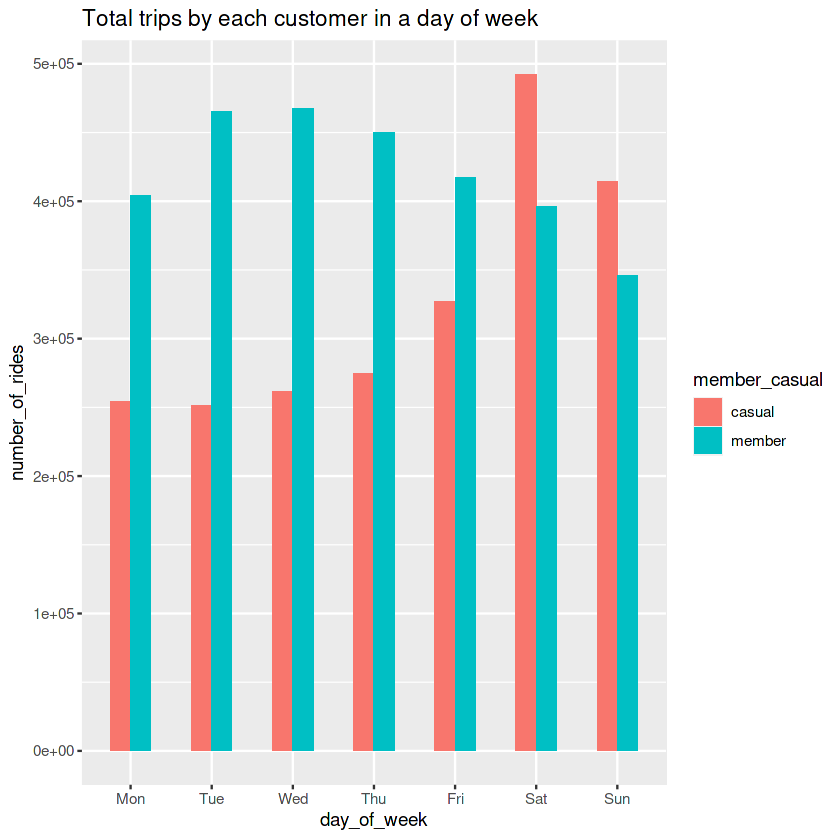

In [42]:
all_trips_data_v2 %>%  
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(member_casual, day_of_week)  %>% 
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  labs(title ="Total trips by each customer in a day of week") +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = TRUE))

We could notice that the number of ride from the casual user will dramastically rise in the beginning of weekend like Friday till Sunday. In the contrary, the number of of member have gradually drop in weekend compare to the weekday. Thus, the marketing plan might be providing the weekend favor discount for the casual member to make them get attractive to the deal in the most using time window of the week.



##### 2.  Average length of travel per trip from casual and member


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'day_of_week' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error 

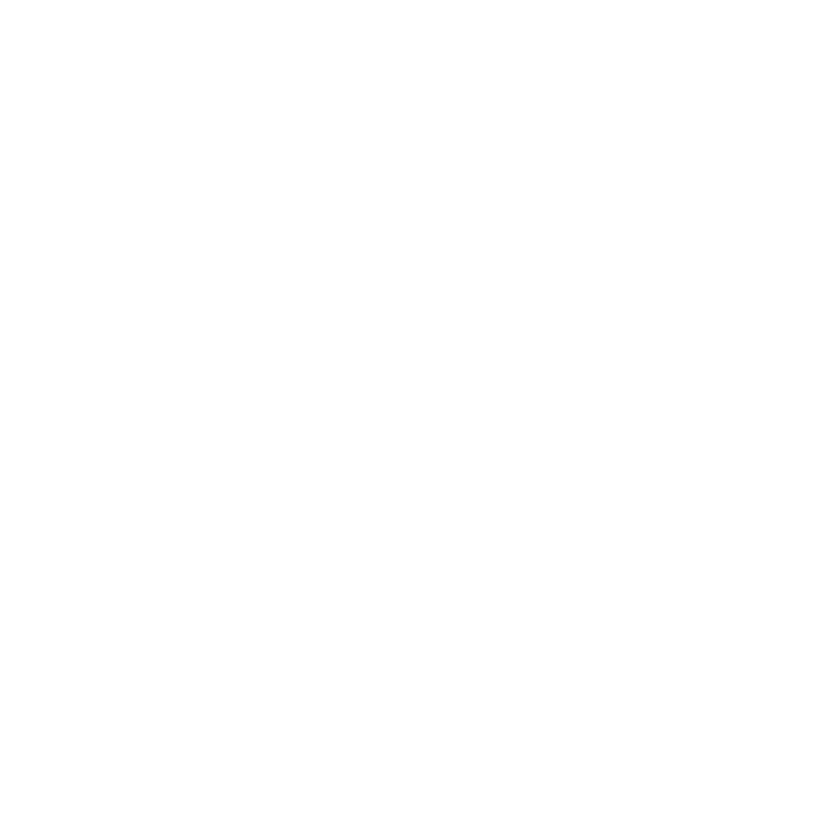

In [43]:
all_trips_data_v2 %>%  
  group_by(member_casual, rideable_type) %>% 
  summarise(average_trip_duration = mean(ride_length)) %>%
  ggplot(aes(x = day_of_week, y = average_trip_duration, fill = member_casual)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) + 
  labs(title ="Average trip duration by customer type Vs. Day of the week")

The average of the trip by the causal is much more in duration compare to member one. Thus, we could make the commercial and marketing plan like the promotion for the more length user use to encourage the causal user to become the member.

##### 3.  Type of ride usage from the type of user

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


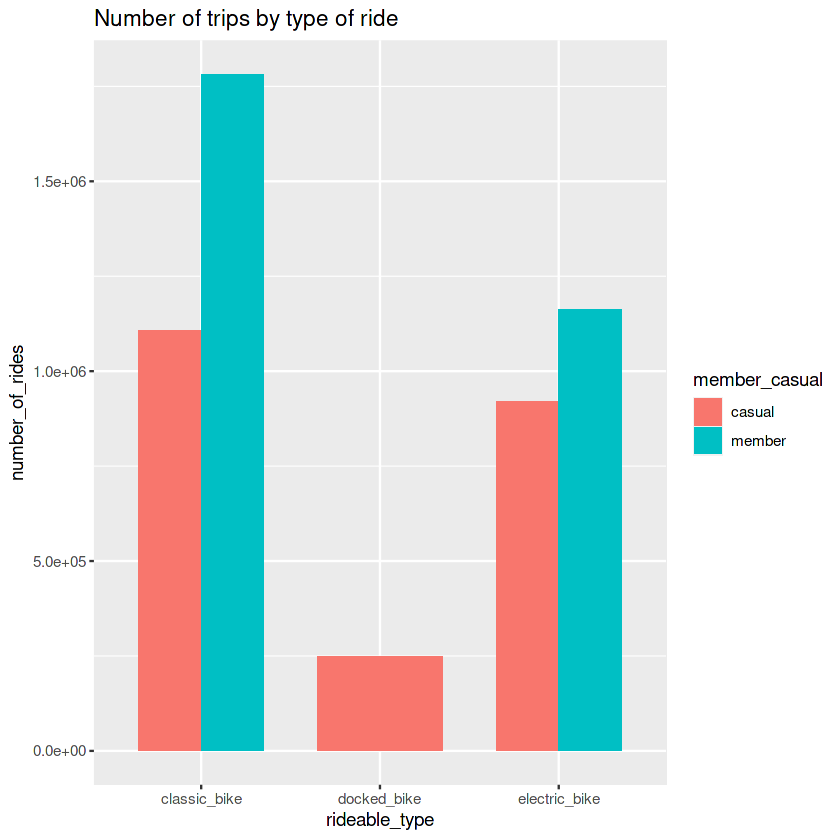

In [44]:
all_trips_data_v2 %>%  
  group_by(member_casual, rideable_type) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(member_casual, rideable_type)  %>% 
  ggplot(aes(x = rideable_type, y = number_of_rides, fill = member_casual)) +
  labs(title ="Number of trips by type of ride") +
  geom_col(width=0.7, position = position_dodge(width=0.7)) +
  scale_y_continuous(labels = function(x) format(x, scientific = TRUE))

As the plot, it is showing the using of ride docked bike is never been used by the member at all. Thus, we could make the plan for the particulatr type of bike.

##### 4.  Usage of bike per day in every hour

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


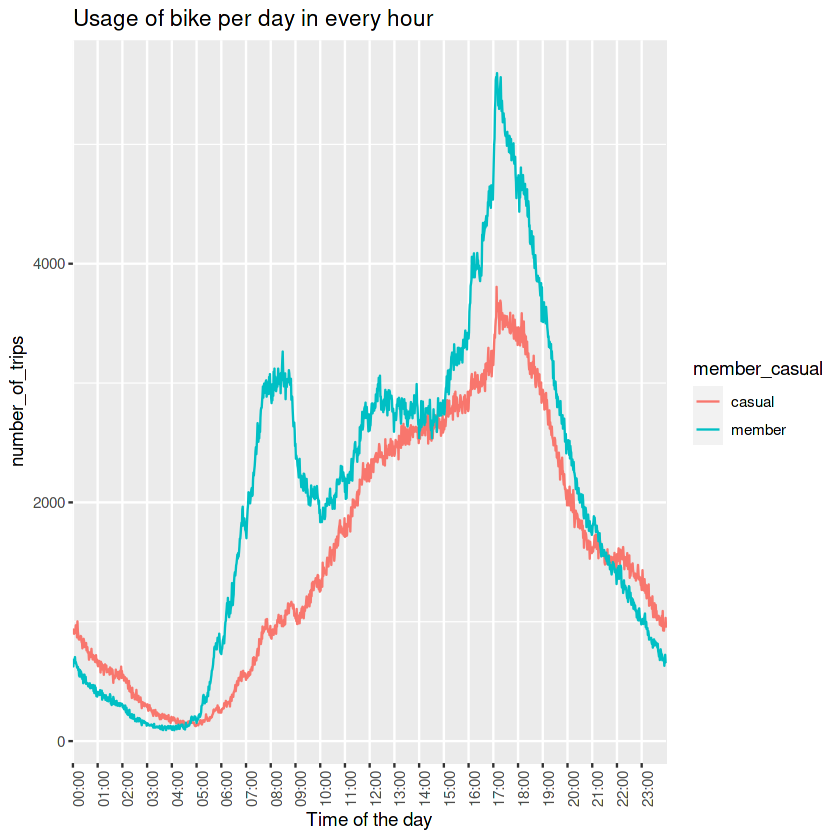

In [45]:
all_trips_data_v2 %>%  
  group_by(member_casual, time) %>% 
  summarise(number_of_trips = n()) %>%
  ggplot(aes(x = time, y = number_of_trips, color = member_casual, group = member_casual,options(repr.plot.width=15, repr.plot.height=8))) +
  geom_line() + scale_x_datetime(date_breaks = "1 hour", minor_breaks = NULL, date_labels = "%H:%M", expand = c(0,0)) +
  theme(axis.text.x = element_text(angle = 90)) + 
  labs(title ="Usage of bike per day in every hour", x = "Time of the day")

The number of trips of casual users are higher in particular time especially in the non-rush hour. Thus, we could make the marketing plan for aim to commerce them in the time that they use the ride and provide some attractive. Members appear to have two distinct peak usage periods: 7-9 AM and 5-7 PM, both of which coincides with the high demand hours of casual riders as well. One may definitely predict that office worker make up the bulk of the member profile due to demand in both the morning and evening hours, but more data is needed to validate this claim.


**Initialize a csv file of the cleaned data for futher analysis or visualizations in other tools**


In [46]:
clean_data <- aggregate(all_trips_data_v2$ride_length ~ all_trips_data_v2$member_casual + all_trips_data_v2$day_of_week, FUN = mean)
write.csv(clean_data, "Clean Data.csv", row.names = F)

## **ACT**

#### **Key Takeaways**

*  During the weekends, casual user are using the service more in the weekend, in the other hand, the member is more using the service in the weekdays.
*  The duration per trip of the casual user are dramastically higher in compare to the member one in every day.
*  None of the member used the docked ride type at all.
*  Usage load of the ride of casual is more than the member one during 22.00 - 4.30.
*  The most usage hour of the service in both membership is 17.00-18.00


#### **Recommendation**
* We could approach the promotion for the casual during the particular time that cusual user are using the service the most like 22.00 - 4.30. to encourage them to get the membership. The promotion like the night life membership.
* Provide the promotion using the term of help related will be the good choices to attract the casual user as the casual user have the longer duration in average on the trip. Thus, provide the promotion as the more you ride the more discount you will get will encourage the casual user to get attracted.
* Provide a discount on membership renewals after the first year. It may persuade infrequent cyclists to join.
* Offer the discount in the non-busy hour as the most casual using the ride service in those particular time window.


#### **Improvement for Analysis**
* Occupation of the user will provide more insight of the data to be analyst
* Age and gender profile - Once again, this information might be utilised to research the type of riders who can be targeted for recruiting new members.
* The Proper location of station - These will provide us the inside of the service usage in the particular area thus we could do more analyst.
* Pricing information for members and casual riders - Using this information, we may be able to improve the cost structure for casual riders or offer discounts without compromising the profit margin.


